**Author**: CodeForAll  
**License**: MIT License

---


# Sinusoidal Response of Mass-Spring-Damper System

In this experiment, we analyze the **sinusoidal response** of a mass-spring-damper system. The sinusoidal response shows how the system reacts when a sinusoidal force is applied as an input.

### System Overview

The mass-spring-damper system is described by the following second-order differential equation:

$$
F(t) = m \cdot \ddot{x}(t) + c \cdot \dot{x}(t) + k \cdot x(t)
$$

Where:
- \( F(t) \) is the applied sinusoidal force (in Newtons, N),
- \( m \) is the mass of the object (in kg),
- \( c \) is the damping coefficient (in Ns/m),
- \( k \) is the spring constant (in N/m),
- \( x(t) \) is the displacement of the mass from its equilibrium position (in meters).

We apply a sinusoidal force to this system and analyze the displacement response for different damping coefficients.

---

### System Transfer Function

The transfer function of the system is:

$$
G(s) = \frac{X(s)}{F(s)} = \frac{1}{m \cdot s^2 + c \cdot s + k}
$$

Where:
- \( s \) is the Laplace variable,
- \( X(s) \) is the Laplace transform of the displacement \( x(t) \),
- \( F(s) \) is the Laplace transform of the sinusoidal input force.

---

### Experiment Setup

We will apply a sinusoidal force with a given frequency \( \omega \) and analyze the system's displacement response for different damping values:

- **Underdamped (c = 0.5 Ns/m)**
- **Critically Damped (c = 1.0 Ns/m)**
- **Overdamped (c = 3.0 Ns/m)**

We will analyze the system's behavior for each of these damping coefficients and compare the results.


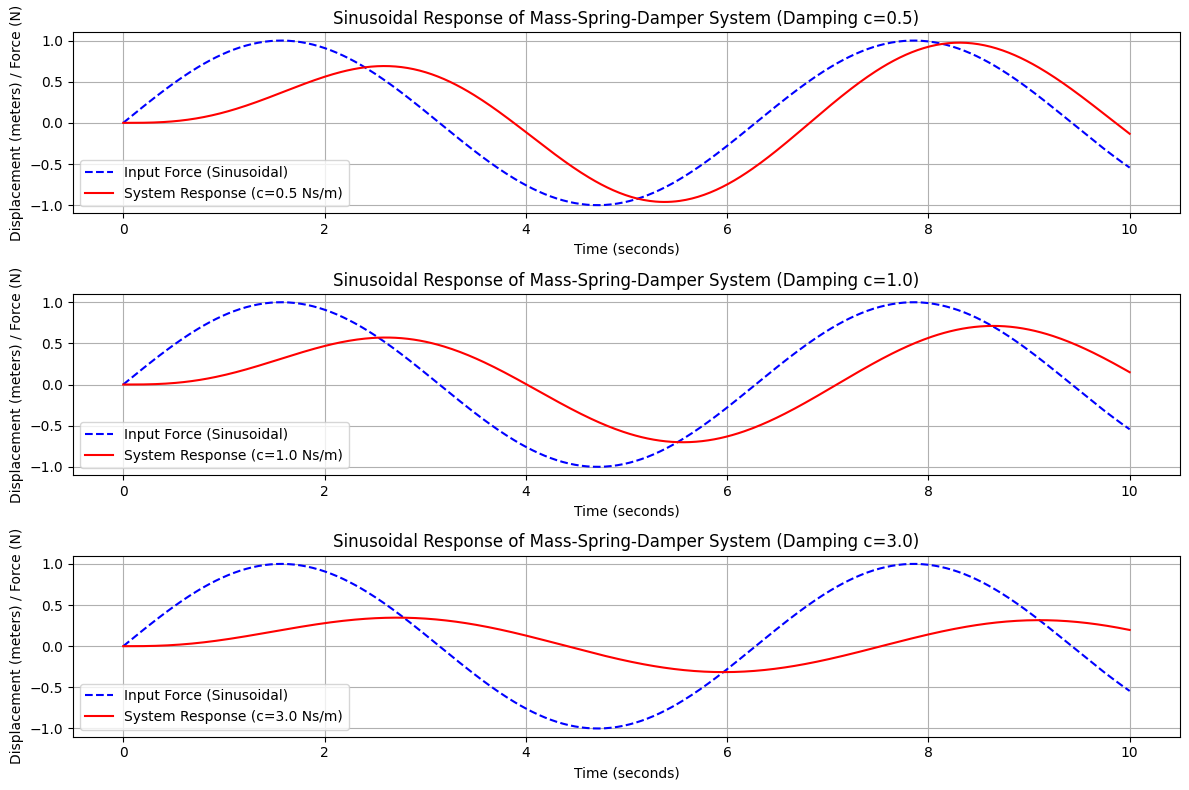

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# System parameters
m = 1  # mass (kg)
k = 2  # spring constant (N/m)
omega = 1  # frequency of the input signal (rad/s)
time = np.linspace(0, 10, 500)  # Time vector (from 0 to 10 seconds, 500 points)

# Different damping coefficients for different system behaviors
damping_values = [0.5, 1.0, 3.0]  # Underdamped, Critically Damped, Overdamped

# Plotting the response for different damping values
plt.figure(figsize=(12, 8))

# Loop through each damping coefficient
for c in damping_values:
    # Create transfer function for each damping value
    system = ctrl.TransferFunction([1], [m, c, k])
    
    # Sinusoidal input (force)
    F = np.sin(omega * time)
    
    # Simulate system response to the sinusoidal input (this is the system's output)
    time_response, response = ctrl.forced_response(system, T=time, U=F)
    
    # Plotting input and output on the same graph for each damping value
    plt.subplot(3, 1, damping_values.index(c) + 1)  # Create subplot for each damping value
    plt.plot(time, F, label='Input Force (Sinusoidal)', linestyle='--', color='blue')
    plt.plot(time_response, response, label=f'System Response (c={c} Ns/m)', color='red')
    
    # Adding title, labels, and legend
    plt.title(f'Sinusoidal Response of Mass-Spring-Damper System (Damping c={c})')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Displacement (meters) / Force (N)')
    plt.legend(loc='best')
    plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Observations

The system’s sinusoidal response is affected by both the input frequency and the damping coefficient. We observe the following behavior for different damping scenarios:

- **Underdamped (c = 0.5)**: 
  - At low frequencies, the system follows the sinusoidal input closely with minimal phase shift. 
  - As the frequency increases, the system’s amplitude remains relatively stable but starts to lag behind the input (increased phase shift).
  - At resonance (around the system's natural frequency), the system shows a higher amplitude response, but it does not oscillate indefinitely due to damping. The amplitude is less than that of a system with no damping.

- **Critically Damped (c = 1.0)**: 
  - The system is less responsive to low-frequency sinusoidal inputs, but it maintains minimal phase shift and follows the input more slowly. 
  - At higher frequencies, the displacement starts to decrease as the system struggles to keep up with the input.
  - In this scenario, the system does not overshoot or oscillate around the equilibrium position, making it highly stable but with a lower amplitude compared to underdamped systems.

- **Overdamped (c = 3.0)**: 
  - At low frequencies, the system still follows the input, but the response is even more sluggish than critically damped systems.
  - As the frequency increases, the system fails to track the input accurately, and the amplitude decreases further.
  - The system is highly stable and avoids oscillation but with a significant lag in response, making it less effective at following higher-frequency inputs.

---

## Conclusion

In the **sinusoidal response** experiment, the damping coefficient \( c \) plays a key role in how the system responds to a periodic sinusoidal input:

- **Underdamped systems** can follow the input better and exhibit larger amplitude at resonance.
- **Critically damped systems** return to equilibrium without oscillations and may have reduced amplitude at resonance.
- **Overdamped systems** have a more sluggish response and cannot follow higher-frequency sinusoidal inputs effectively.

This experiment highlights the importance of damping in controlling the system’s ability to track sinusoidal inputs, and it is relevant in practical applications like vibration control, audio systems, and mechanical systems that must endure periodic forces.
